In [1]:
#Train a KNN model on glass type dataset and find best n_neighnours.

In [3]:
# Importing libraries and functions

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [4]:
# Load the dataset
data = pd.read_csv('glass.csv')
data.drop_duplicates(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      213 non-null    float64
 1   Na      213 non-null    float64
 2   Mg      213 non-null    float64
 3   Al      213 non-null    float64
 4   Si      213 non-null    float64
 5   K       213 non-null    float64
 6   Ca      213 non-null    float64
 7   Ba      213 non-null    float64
 8   Fe      213 non-null    float64
 9   Type    213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.3 KB


In [5]:
data.head()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [6]:
# Separate the features and target variable
X = data.drop('Type', axis=1)
y = data['Type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [7]:
# Scaling Data

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Creating a model function

def knn_func(train_x, train_label, test_x, k):
    """
    train_x - train features
    train_label - train targets
    test_x - validation data(features)
    k - nearest neighbours <int>
    """
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(train_x, train_label)
    prediction = knn.predict(test_x)
    return prediction

In [9]:
# For best n_neighbours
import math
n = data.shape[0]
k_max = math.sqrt(n)
k_max

14.594519519326424

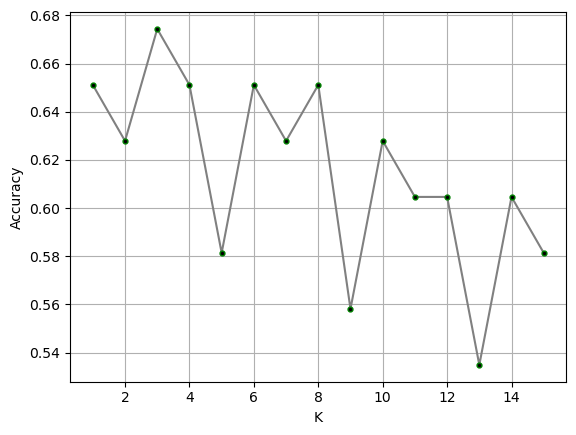

In [10]:
normal_accuracy = []
k_values = range(1,16)

for k in k_values :
    y_pred = knn_func(X_train,y_train,X_test,k)
    accur = accuracy_score(y_test,y_pred)
    normal_accuracy.append(accur)

plt.plot(k_values,normal_accuracy,c="grey",marker=".",ms=7,mfc="black",mec="green")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

## From above graph of Accuracy vs K, best value for n_beighbours is 3